# TODO
* Deck
    * What is Data Science?
    * Why do we want to predict/understand things?
    * What forms these things can take.
* Here
    * Intro to our example & linear regression
    * Train a basic model
    * Evaluate model & discuss other evaluation metrics
    * Talk about deployment, potentially have one deployed they can hit with an API

# What are we doing here?
This is the Infinityworks Data Science 101 workshop. We will be training a model to predict...*drum roll*...The weight of various star wars characters based on their other vital statistics.

Don't say we didn't try to make this exciting!

## Wait, what is this sourcery? Am in an IDE here or what?
This is a Jupyter Notebook. It's a standard bit of kit in Data Science circles. It's shite for proper code dev but there's few better tools for doing investigative coding and mixing it with notes and charts. If you want to learn a bit more then there's a link [here]().

For now, just enjoy the ride and have a play. If, for example, you click on this text you can edit it as Markdown.

TODO: Add the link to my notebook 101.

### First things first, we need some libraries

In [36]:
import pandas as pd     # Standard Python data handling library. Lets you store tables (often called `DataFrames`)
import seaborn as sns   # Plotting library, there's many to choose from but this is a stalwart
import matplotlib.pyplot as plt  # Matplotlib is the underlying library to seaborn, it's used to do some fancy stuff later.

# Sklearn is the standard Python stats tooling. It's...large and unwieldy but goes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


### Now, some data

In [3]:
df = pd.read_csv("characters.csv")
df = df[~pd.isnull(df.mass)]
df.mass = df.mass.str.replace(",", "").astype("float")
df.height = df.height.astype("float")
df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19BBY,male,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112BBY,NaN,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33BBY,NaN,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9BBY,male,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19BBY,female,Alderaan,Human
5,Owen Lars,178.0,120.0,"brown, grey",light,blue,52BBY,male,Tatooine,Human
6,Beru Whitesun lars,165.0,75.0,brown,light,blue,47BBY,female,Tatooine,Human
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,NaN,Tatooine,Droid
8,Biggs Darklighter,183.0,84.0,black,light,brown,24BBY,male,Tatooine,Human
9,Obi-Wan Kenobi,182.0,77.0,"auburn, white",fair,blue-gray,57BBY,male,Stewjon,Human


## Job one is *always* to look at your data first
TODO: Some plots

## Now, let's model!

<AxesSubplot:xlabel='mass', ylabel='preds'>

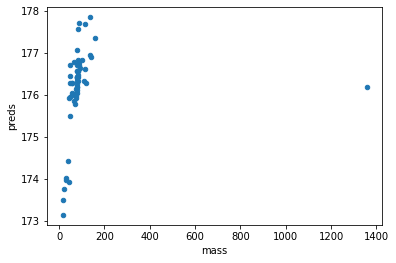

In [26]:
mod = LinearRegression()
mod.fit(df.mass.to_numpy().reshape(-1,1), df.height)
df["preds"] = mod.predict(df.height.to_numpy().reshape(-1,1))
df["raw_error"] = df.preds - df.mass

df.plot.scatter(x="mass", y="preds")

Let's add a line of best fit here, what we expect to see if predictions == actual mass.

As you can see, it's a bag o'shite but the thing to note is that the *error* in these predictions is the difference between each blue point and the green line

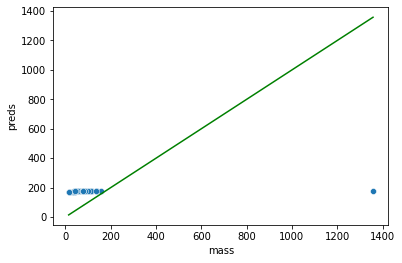

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data=df, x='mass', y='preds', ax=ax)
p2 = sns.lineplot(data=df, x='mass', y='mass', color='g', ax=ax)

# What's gone wrong?
It's fair to say it's all Jabba's fault!

In [30]:
cols = ["name", "height", "mass", "raw_error"]
df[cols].sort_values("raw_error")

,name,height,mass,raw_error
15,Jabba Desilijic Tiure,175.0,1358.0,-1181.802310
76,Grievous,216.0,159.0,18.348579
21,IG-88,200.0,140.0,36.899452
3,Darth Vader,202.0,136.0,40.955593
77,Tarfful,234.0,136.0,41.853847
5,Owen Lars,178.0,120.0,56.281902
22,Bossk,190.0,113.0,63.618747
12,Chewbacca,228.0,112.0,65.685424
17,Jek Tono Porkins,180.0,110.0,66.338043
67,Dexter Jettster,198.0,102.0,74.843311


# Can we put a number on the error?
There's lots of ways, and what you use depends on the type of thing you are predicting (a category or a continuous variable). We are doing the latter so the favourites are:

* Mean Squared Error: Take the errors from above, square them and add them together. This means that big errors get magnified, helping us to see when something is *really* wrong
* Root Mean Squared Error: As above, then take the square root. Useful as the result is easier to relate to your data.
* Mean Absolute error: Average of the raw errors, a bit crap as negatives cancel out the positives!

Have a look at the below and try to relate what you are seeing with the bullets and the table above, do you get why the answers are different? Which do you think is best in this instance?

In [32]:
{
 "mean_squared_error": mean_squared_error(df.mass, df.preds),
 "root_mean_squared_error": mean_squared_error(df.mass, df.preds, squared=False),
 "mean_absolute_error": mean_absolute_error(df.mass, df.preds)
}

{'mean_squared_error': 34404.13501442758,
 'root_mean_squared_error': 185.48351682677244,
 'mean_absolute_error': 118.91932656471072}

# What do we do about Jabba?
Oh, lots of things. We could add species as a variable in the model, allowing it to learn that Hutts are a little different to everyone else. We could just drop him from the data and tell the customer "We can't predict Hutts". Given the data we have I'm going with the second option.

I'm also going to add some complexity here. It's generally considered bad form to evaluate your model with the same data that you trained it with. It could just learn some nuance in your data and not work in production!

As such, we are going to split the data into a train and a test set while we are at it.

In [34]:
# Filter out all Hutts, they just don't lend themselves to BMI calculations!
df_no_hutts = df.loc[df.species != "Hutt"]

# shape gives us row, column count so we can be sure we've not done anythign silly
print(df.shape, df_no_hutts.shape)

(59, 12) (58, 12)


In [39]:
# Now split the data into training and test sets. Check shape again.
height_train, height_test, mass_train, mass_test = train_test_split(df_no_hutts.height, df_no_hutts.mass, test_size=0.20)

print(height_train.shape, height_test.shape)

(46,) (12,)


In [61]:
# Train the new model
mod = LinearRegression()
mod.fit(height_train.to_numpy().reshape(-1,1), mass_train)

preds = mod.predict(height_test.to_numpy().reshape(-1,1))

LinearRegression()

# The next bit is up to you!
I've given you some empty cells below but you can make more or delete them as required. Go steal some code from higher up (or just t'internet) and tell me:

* Which model is better?
* Why?